In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from keras.optimizers import Adam
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [73]:
df = pd.read_csv('/content/drive/MyDrive/Data Science Projects/stroke_prediction/healthcare-dataset-stroke-data.csv')

In [74]:
from sklearn.utils import shuffle
df_shuff = shuffle(df)
df_shuff.drop(columns=['id'], inplace=True)
#df_shuff

In [75]:
print("The shape before removing the outliers : ",df_shuff.shape)
df_shuff.drop(df_shuff[df_shuff['bmi'] > 47].index, inplace = True)
df_shuff.drop(df_shuff[(df_shuff['stroke'] == 0) & (df_shuff['avg_glucose_level'] > 167)].index, inplace = True)
df_shuff.drop(df_shuff[(df_shuff['stroke'] == 1) & (df_shuff['age'] < 30)].index, inplace = True)
print("The shape after removing the outliers : ",df_shuff.shape)

The shape before removing the BMI outliers :  (5110, 11)
The shape after removing the BMI outliers :  (4469, 11)


In [76]:
X = df_shuff.drop(columns=['stroke'])
y = df_shuff.stroke
X_dum = pd.get_dummies(X, columns=['gender','ever_married','work_type','Residence_type','smoking_status'])

In [77]:
s = StandardScaler()
X_dum[['avg_glucose_level', 'age','bmi']] = s.fit_transform(X_dum[['avg_glucose_level', 'age', 'bmi']])

In [78]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)

X_dum[['bmi']] = imputer.fit_transform(X_dum[['bmi']])

In [79]:
from imblearn.over_sampling import RandomOverSampler

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_dum, y)

In [80]:
X_over.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [81]:
X_over = X_over[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes']]

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_over, y_over, test_size = 0.2, random_state = 80)

In [83]:
model = Sequential()
tf.random.set_seed(156) # for consistent results
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer=Adam(learning_rate=0.009), loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    epochs=150,
                    validation_split=0.2,
                    shuffle=True
                    )

Epoch 1/150
169/169 [==============================] - 1s 4ms/step - loss: 0.3831 - accuracy: 0.7907 - val_loss: 0.3178 - val_accuracy: 0.8254
Epoch 2/150
169/169 [==============================] - 1s 3ms/step - loss: 0.3265 - accuracy: 0.8266 - val_loss: 0.2909 - val_accuracy: 0.7936
Epoch 3/150
169/169 [==============================] - 1s 4ms/step - loss: 0.2831 - accuracy: 0.8504 - val_loss: 0.2678 - val_accuracy: 0.8469
Epoch 4/150
169/169 [==============================] - 1s 3ms/step - loss: 0.2482 - accuracy: 0.8767 - val_loss: 0.2308 - val_accuracy: 0.8839
Epoch 5/150
169/169 [==============================] - 1s 3ms/step - loss: 0.2193 - accuracy: 0.8992 - val_loss: 0.2155 - val_accuracy: 0.9001
Epoch 6/150
169/169 [==============================] - 0s 3ms/step - loss: 0.2011 - accuracy: 0.9142 - val_loss: 0.1930 - val_accuracy: 0.9201
Epoch 7/150
169/169 [==============================] - 1s 3ms/step - loss: 0.1689 - accuracy: 0.9236 - val_loss: 0.1763 - val_accuracy: 0.9268

In [85]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 256)               5376      
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dense_20 (Dense)            (None, 1)                 129       
                                                                 
Total params: 38,401
Trainable params: 38,401
Non-trainable params: 0
_________________________________________________________________


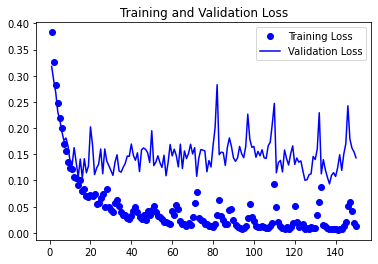

In [86]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

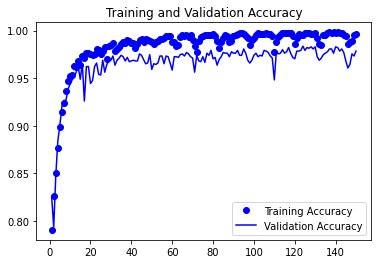

In [87]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [88]:
# Part 3 : Making Predictions and Evaluating the Model

# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,Y_test)

53/53 [==============================] - 0s 2ms/step


In [89]:
score

0.978698224852071

In [90]:
cm

array([[789,  36],
       [  0, 865]])